# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

Analyse

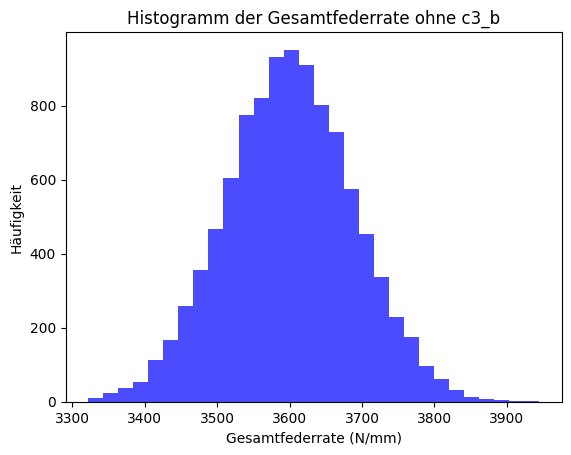

Durchschnittliche Federrate: 3600.66 N/mm
Varianz: 7810.36 (N/mm)²
Standardabweichung: 88.38 N/mm


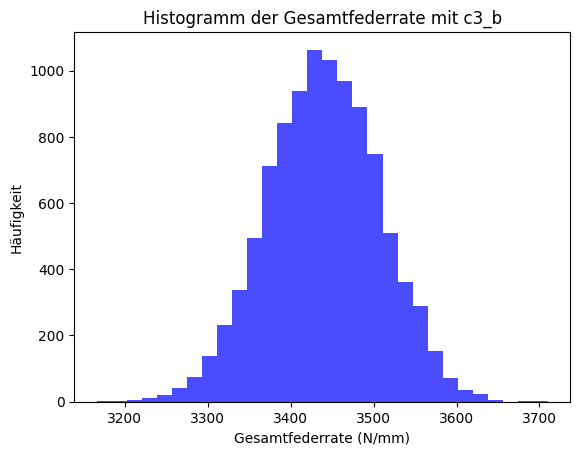

Durchschnittliche Federrate: 3439.8 N/mm
Varianz: 4554.69 (N/mm)²
Standardabweichung: 67.49 N/mm


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

N = 10000  # Anzahl Federspeicher
P = 8       # Anzahl Federn Pro Paket
i = 2.6     # Übersetzungsrate

def simulate_individual_springs(N, P, use_c3_b=False):
    c1_values = np.random.uniform(low=80, high=120, size=(N, P))
    c2_values = np.random.uniform(low=120, high=180, size=(N, P))

    if use_c3_b:
        c3_values = np.random.uniform(low=160, high=200, size=(N, P))
    else:
        c3_values = np.random.uniform(low=160, high=240, size=(N, P))

    return c1_values, c2_values, c3_values

def calculate_total_spring_rate(N, P, use_c3_b=False):
    c1_values, c2_values, c3_values = simulate_individual_springs(N, P)

    if use_c3_b:
        c3_b_values = simulate_individual_springs(N, P, True)[2]
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_b_values, axis=1)
    else:
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_values, axis=1)

    return c_gesamt

def plot_histogram_and_statistics(data, title):
    plt.hist(data, bins=30, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Gesamtfederrate (N/mm)')
    plt.ylabel('Häufigkeit')
    plt.show()

    print(f"Durchschnittliche Federrate: {round(np.mean(data), 2)} N/mm")
    print(f"Varianz: {round(np.var(data), 2)} (N/mm)²")
    print(f"Standardabweichung: {round(np.std(data), 2)} N/mm")

# Simulation und Analyse ohne c3_b Federn
c_gesamt_c3 = calculate_total_spring_rate(N, P, use_c3_b=False)
plot_histogram_and_statistics(c_gesamt_c3, 'Histogramm der Gesamtfederrate ohne c3_b')

# Simulation und Analyse mit c3_b Federn
c_gesamt_c3b = calculate_total_spring_rate(N, P, use_c3_b=True)
plot_histogram_and_statistics(c_gesamt_c3b, 'Histogramm der Gesamtfederrate mit c3_b')
